# ДЗ Сираевой Гульнары по построению гипотез

Датасет взят с каггла [https://www.kaggle.com/datasets/dwdkills/alcohol-consumption-in-russia](https://www.kaggle.com/datasets/dwdkills/alcohol-consumption-in-russia)

Данный датасет представляет данные по потреблению алкоголя в России за 1988-2016гг. Он содержит данные по потреблению следующих крепких напитков: вина, пива, водки, бренди и шампанского.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("russia_alcohol.csv", na_values = ['na',], encoding='latin1')
data

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


In [ ]:
data.describe()

,year,wine,beer,vodka,champagne,brandy
count,1615.000000,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000
mean,2007.000000,5.628144,51.260148,11.818694,1.313177,0.526998
std,5.478922,2.813208,25.372821,5.128806,0.797956,0.400201
min,1998.000000,0.100000,0.400000,0.050000,0.100000,0.000000
25%,2002.000000,3.575000,32.400000,8.300000,0.800000,0.200000
50%,2007.000000,5.400000,49.970000,11.500000,1.200000,0.400000
75%,2012.000000,7.377500,67.400000,15.000000,1.665000,0.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000


Наши данные представлены числовыми значениями int (год) и float64 (показатели потребления алкоголя на душу населения)

In [ ]:
data.corr(method = 'pearson')

<ipython-input-48-8189ca41251e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method = 'pearson')


,year,wine,beer,vodka,champagne,brandy
year,1.000000,0.369481,0.387994,-0.422311,0.337706,0.491721
wine,0.369481,1.000000,0.491524,0.278572,0.468570,0.555329
beer,0.387994,0.491524,1.000000,0.197739,0.452691,0.459236
vodka,-0.422311,0.278572,0.197739,1.000000,0.270013,0.213506
champagne,0.337706,0.468570,0.452691,0.270013,1.000000,0.779119
brandy,0.491721,0.555329,0.459236,0.213506,0.779119,1.000000


<ipython-input-52-9cb157ae072e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(data.corr())
<ipython-input-52-9cb157ae072e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, mask=matrix, cmap="RdPu", vmin=0.0, vmax=1.0);


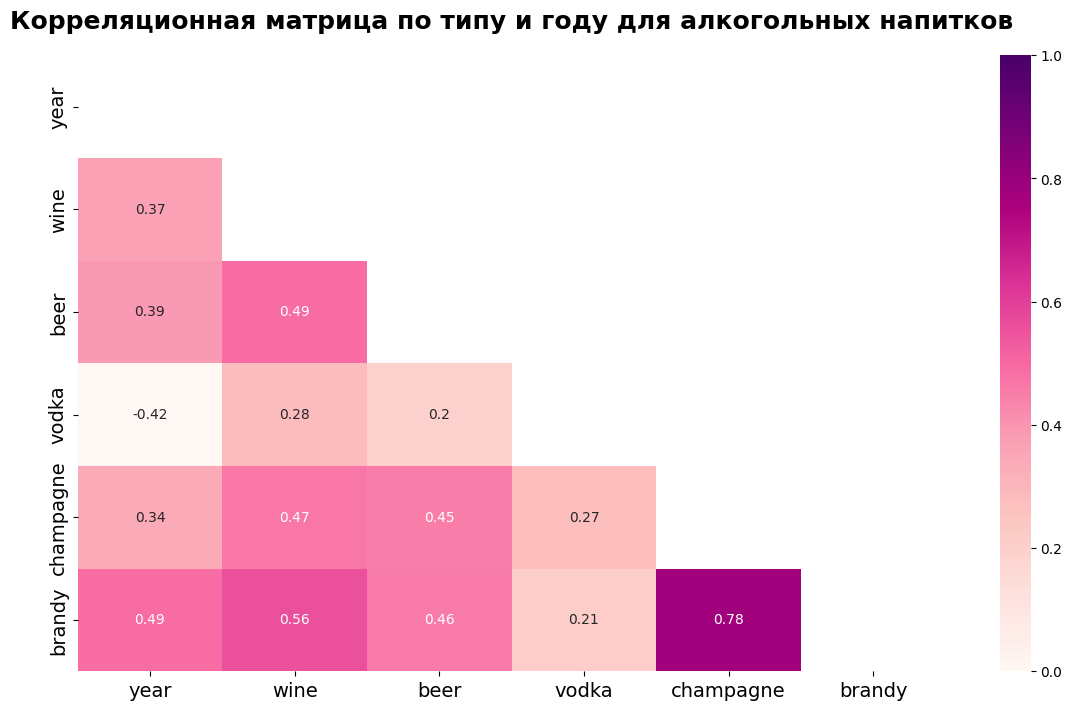

In [ ]:
plt.figure(figsize=(14,8), dpi=100)
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix, cmap="RdPu", vmin=0.0, vmax=1.0);
plt.title('Корреляционная матрица по типу и году для алкогольных напитков', fontsize=18, fontweight="bold", y=1.03)
plt.tick_params(labelsize=14);

**Вывод:** касательно корреляции по методу Пирсона, видим, что наиболее сильная корреляция по потреблению шампанского и бренди, самая слабая между водкой и пивом (по модулю)

# Гипотезы

Сформируем 1 гипотезу:
**"Республика Татарстан потребляет алкогоголя в год на 10% меньше, чем Республика Башкортостан"**

Сформируем 2 гипотезу: **"В Республике Татарстан пиво популярнее водки на 10%"**

Сформируем 3 гипотезу: **"С 1998 по 2016гг. в России всегда росло потребление пива"**

Проверим гипотезу 3: **"С 1998 по 2016гг. в России всегда росло потребление пива"**

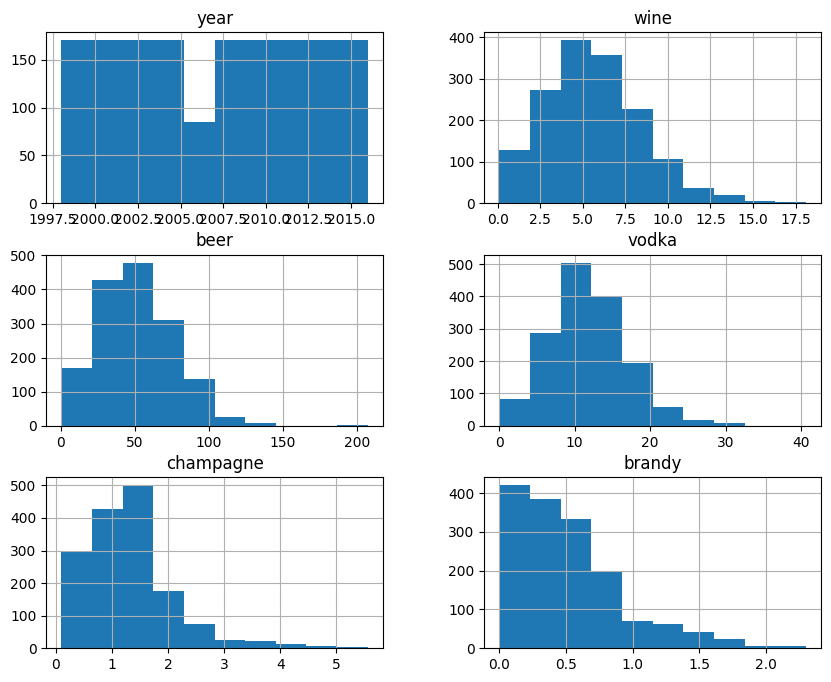

In [ ]:
gist=data.hist(figsize=(10,8))
plt.show();
# beer - пиво
# wine - вино
# vodka - водка
# champagne - шампанское
# brandy - бренди

Из построенной гистограммы видим, что гипотеза 3 не оправдывает ожидания, но всё же посмотрим потребление по годам.

In [ ]:
#Посмотрим среднее потребление алкоголя в разрезе видов алкоголя
mean_cons_per_year = data.groupby('year', as_index=False).agg({'vodka':'median', 'wine':'median', 'beer':'median', 'champagne':'median', 'brandy':'median'})

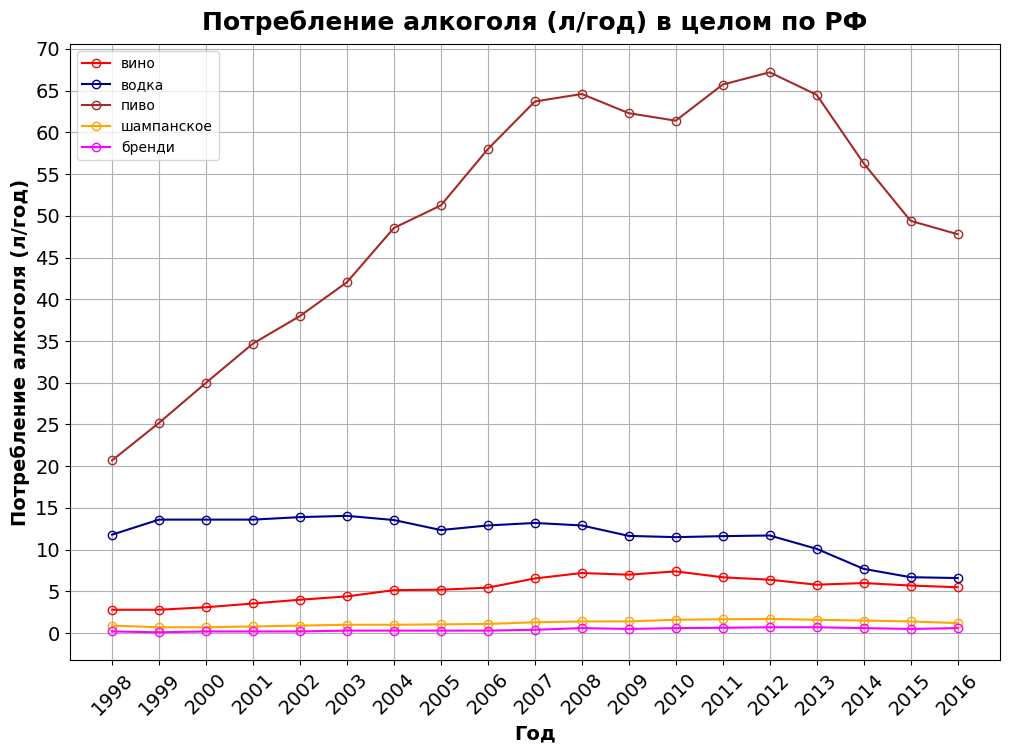

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]

plt.xlabel('Год')
plt.ylabel('Потребление алкоголя в л/год в среднем по регионам')

plt.plot(mean_cons_per_year.year, mean_cons_per_year.wine, marker='o', markerfacecolor = "None", color='red', label='вино')
plt.plot(mean_cons_per_year.year, mean_cons_per_year.vodka, marker='o', markerfacecolor = "None", color='darkblue', label='водка')
plt.plot(mean_cons_per_year.year, mean_cons_per_year.beer, marker='o', markerfacecolor = "None", color='brown', label='пиво')
plt.plot(mean_cons_per_year.year, mean_cons_per_year.champagne, marker='o', markerfacecolor = "None", color='orange', label='шампанское')
plt.plot(mean_cons_per_year.year, mean_cons_per_year.brandy, marker='o', markerfacecolor = "None", color='magenta', label = 'бренди')

plt.title('Потребление алкоголя (л/год) в целом по РФ', fontsize=18, fontweight="bold", y=1.01)
plt.xlabel("Год", fontsize=14, fontweight="bold")
plt.ylabel("Потребление алкоголя (л/год)", fontsize=14, fontweight="bold")
plt.tick_params(labelsize=14)
plt.xticks([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], rotation = 45)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])

plt.grid(True)
plt.legend();

**Вывод:** на основе построенного графика, гипотеза 3 **"С 1998 по 2016гг. в России всегда росло потребление пива"** не подтверждается, т.к. потребление пива в РФ согласно графику росло с 1998 по 2008, и далее до 2016г. потребление пива постепенно уменьшалось.

# Дополнительные сравнения

In [ ]:
f = data[["region", "beer"]].groupby(["region"]).mean().unstack(level=0)
f

      region                        
beer  Altai Krai                        48.373158
      Altai Republic                    36.724211
      Amur Oblast                       53.377368
      Arkhangelsk Oblast                47.036842
      Astrakhan Oblast                  54.695263
                                          ...    
      Vologda Oblast                    67.206842
      Voronezh Oblast                   54.911053
      Yamalo-Nenets Autonomous Okrug    80.137895
      Yaroslavl Oblast                  63.331579
      Zabaykalsky Krai                  67.812105
Length: 85, dtype: float64

In [ ]:
data_transformed = pd.DataFrame(columns=['year','region','drink','consumption'])
for index,row in data.iterrows():
    s = pd.Series([row['year'], row['region'], 'wine', row['wine']],df_transformed.columns)
    s1 = pd.Series([row['year'], row['region'], 'beer', row['beer']],df_transformed.columns)
    s2 = pd.Series([row['year'], row['region'], 'vodka', row['vodka']],df_transformed.columns)
    s3 = pd.Series([row['year'], row['region'], 'champagne', row['champagne']],df_transformed.columns)
    s4 = pd.Series([row['year'], row['region'], 'brandy', row['brandy']],df_transformed.columns)
    data_transformed= data_transformed.append([s,s1,s2,s3,s4], ignore_index=True)

<ipython-input-71-87aa0e826f7f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_transformed= data_transformed.append([s,s1,s2,s3,s4], ignore_index=True)


<ipython-input-78-a4cdaef6c189>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  beer_region = data_transformed[data_transformed['drink']=='beer'].groupby('region').mean()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


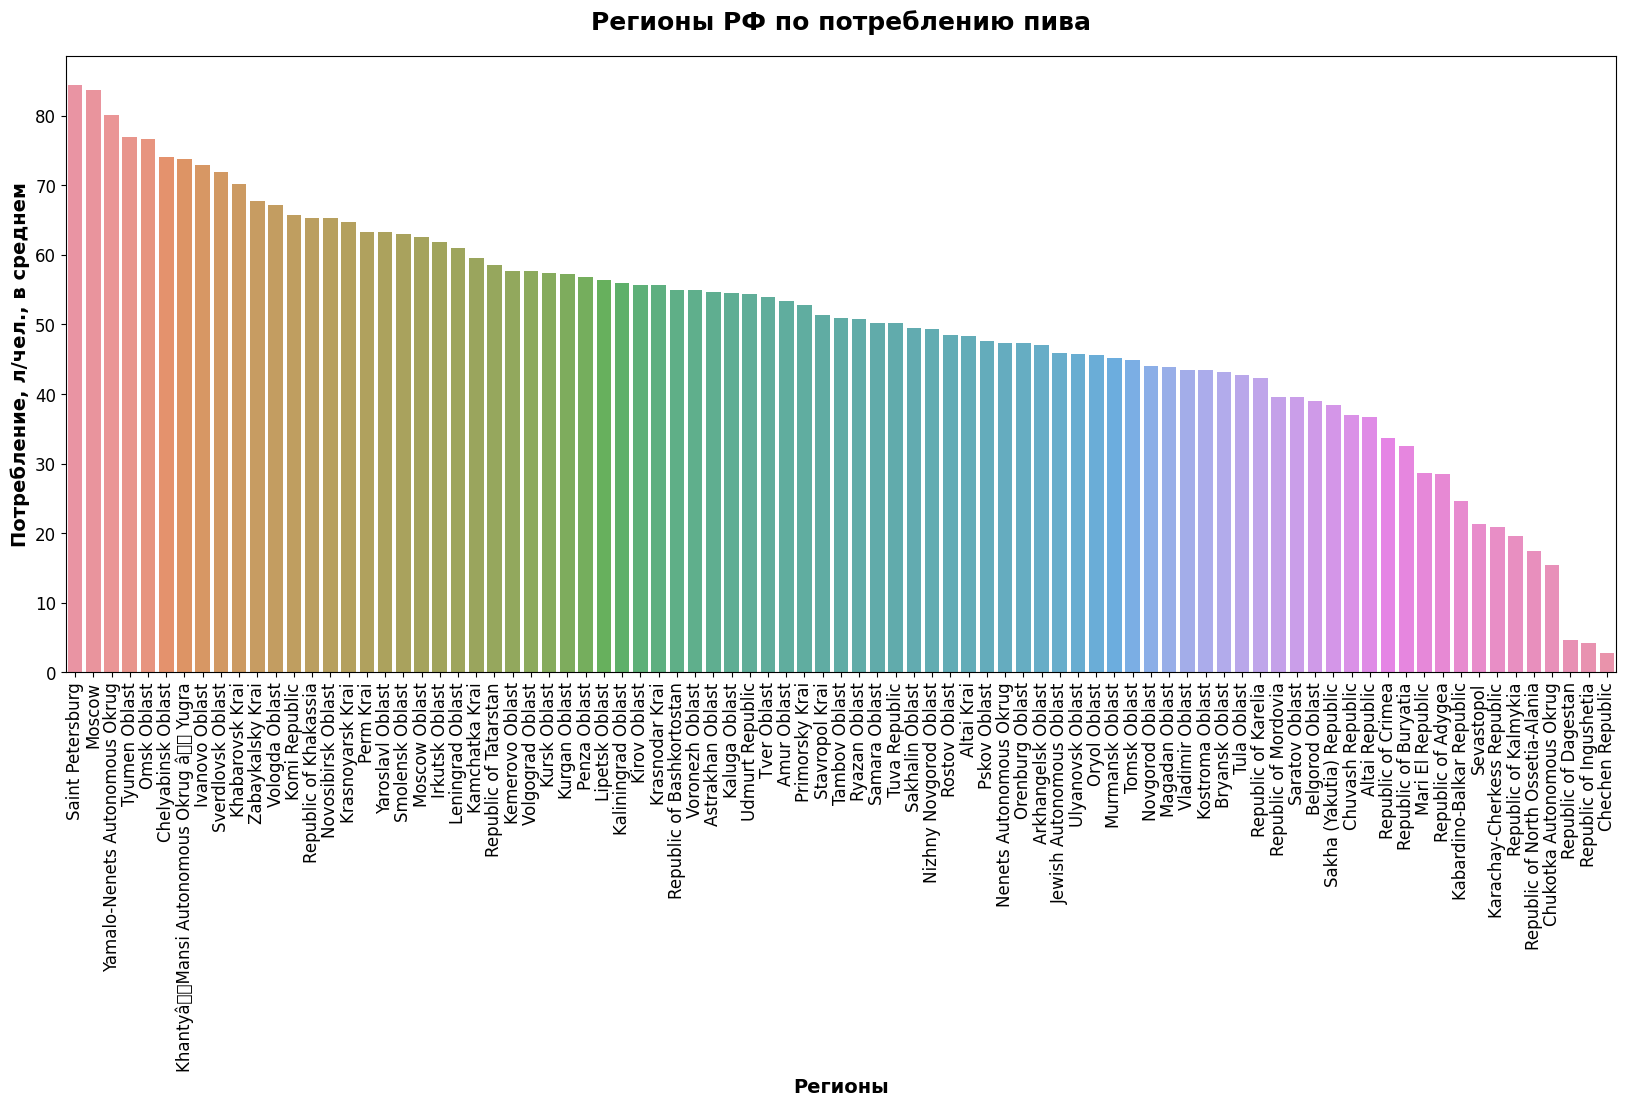

In [ ]:
beer_region = data_transformed[data_transformed['drink']=='beer'].groupby('region').mean()
beer_region = beer_region.reset_index().sort_values(by='consumption',ascending=False)
plt.figure(figsize=(20,8))
g=sns.barplot(data=beer_region,y='consumption',x='region', palette="husl", alpha=0.85)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.tick_params(labelsize=12)
plt.title('Регионы РФ по потреблению пива', fontsize=18, fontweight="bold", y=1.03)
plt.xlabel("Регионы", fontsize=14, fontweight="bold")
plt.ylabel("Потребление, л/чел., в среднем", fontsize=14, fontweight="bold", x=0.5)

plt.show();

На графике видно потребление пива по регионам. С учетом того, что не были предварительно очищены данные, не стоит делать выводы, что самые менее пьющие пиво регионы это Чечня, Ингушетия и Чукотка.